In [1]:
# Basic import
import os
import sys
import json
import math
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Helper function
def writeProgress(msg, count, total):
    sys.stdout.write(msg + "{:.2%}\r".format(count/total))
    sys.stdout.flush()
    
def newPath(path):
    if not os.path.isdir(path):
        os.mkdir(path)

def read_json(src_path):
    with open(src_path, 'r') as json_file:
        data = json.load(json_file)
    return data

def write_json(data,dst_path):
    with open(dst_path, 'w') as outfile:
        json.dump(data, outfile)

def writeLog(row):
    with open('log.txt', 'a') as outfile:
        outfile.write(row + '\n')

def getErrMsg(e):
    error_class = e.__class__.__name__ #取得錯誤類型
    detail = e.args[0] #取得詳細內容
    errMsg = "[{}] {}".format(error_class, detail)
    return errMsg

In [3]:
observable = ['sonypictures', 'wbpictures', 'disneystudios', 'paramountpics',
              'riancjohnson', 'elizabethbanks', 'jimmyfallon', 'lizzobeeating', 'arianagrande']

In [4]:
df = pd.read_csv('./99dims_follow.csv', index_col = 'username')
df = df.loc[:, observable]
df

,sonypictures,wbpictures,disneystudios,paramountpics,riancjohnson,elizabethbanks,jimmyfallon,lizzobeeating,arianagrande
username,,,,,,,,,
hustlersmovie,0,0,0,0,0,1,1,1,0
highstrungmovie,1,0,0,0,0,0,1,1,0
charliesangels,1,0,0,0,0,1,0,0,1
thelegomovie,0,1,0,0,0,1,0,0,0
angrybirdsmovie,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
artofracingmovie,0,0,0,0,0,0,0,0,0
dolemiteismyname,0,0,0,0,0,0,0,0,0
playingwithfire,0,0,0,1,0,0,0,0,0


In [5]:
cols = df.columns
raw = np.asarray(df)
raw.shape

(165, 9)

In [6]:
row = df.shape[0]
col = df.shape[1]
window = 30
margin = math.floor(window*0.5)
area = np.zeros((df.shape))

print('row:', row)
print('col:', col)
print('window:', window)
print('margin:', margin)
print('area:', area.shape)

row: 165
col: 9
window: 30
margin: 15
area: (165, 9)


In [7]:
for j in range(area.shape[1]):
    clmn = raw[:, j]
#     print(clmn.shape)
#     print(clmn)
    expand = np.pad(clmn, (margin,), 'edge')
#     expand = np.pad(clmn, (margin,), 'constant', constant_values=(0, 0))
#     print(expand.shape)
#     print(expand)

    for i in range(area.shape[0]):
#         print(i, j)
#         print(raw[i:i+window, j])
        avg = np.sum(expand[i:i+window])
#         print(avg)
        area[i][j] = math.tanh(avg)

In [8]:
pd.DataFrame(area)

,0,1,2,3,4,5,6,7,8
0,1.0,0.964028,0.0,0.000000,0.000000,1.0,1.0,1.0,0.964028
1,1.0,0.964028,0.0,0.000000,0.000000,1.0,1.0,1.0,0.995055
2,1.0,0.964028,0.0,0.000000,0.000000,1.0,1.0,1.0,0.999329
3,1.0,0.964028,0.0,0.000000,0.000000,1.0,1.0,1.0,0.999329
4,1.0,0.964028,0.0,0.000000,0.000000,1.0,1.0,1.0,0.999329
...,...,...,...,...,...,...,...,...,...
160,0.0,0.000000,1.0,0.964028,0.964028,0.0,0.0,0.0,0.000000
161,0.0,0.000000,1.0,0.964028,0.964028,0.0,0.0,0.0,0.000000
162,0.0,0.000000,1.0,0.964028,0.964028,0.0,0.0,0.0,0.000000
163,0.0,0.000000,1.0,0.761594,0.964028,0.0,0.0,0.0,0.000000


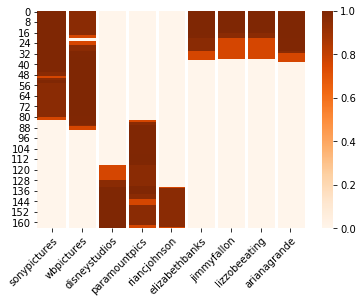

In [12]:
import seaborn as sns
# plt.figure(figsize=(491,141))
ax = sns.heatmap(area, xticklabels=cols, cmap='Oranges')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(1, col):
    ax.axvline(linewidth=3,x=i, color='white')
# plt.savefig('output.png')
plt.show()